# Netflix Movie Research

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from sklearn import datasets, linear_model
import sklearn.preprocessing as sklp
from sklearn.cross_validation import train_test_split
import statsmodels.api as sm
%matplotlib inline

/Users/ChuanShi/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/ChuanShi/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### 1. Loading data into Pandas

In [2]:
df = pd.read_csv('/Users/ChuanShi/src/Movie/data.csv')
df.head()

,Day_of_Week,Director,Genre,Movie_Title,Release_Date,Studio,Adjusted_Gross,Budget,Gross_rev,IMDb_Rating,MovieLens_Rating,Overseas_rev,Overseas_Perc,Profit,Profit_perc,Runtime_min,US_rev,US_perc
0,Friday,Brad Bird,action,Tomorrowland,22/05/2015,Buena Vista Studios,202.1,170.0,202.1,6.7,3.26,111.9,55.4,32.1,18.9,130,90.2,44.6
1,Friday,Scott Waugh,action,Need for Speed,14/03/2014,Buena Vista Studios,204.2,66.0,203.3,6.6,2.97,159.7,78.6,137.3,208.0,132,43.6,21.4
2,Friday,Patrick Hughes,action,The Expendables 3,15/08/2014,Lionsgate,207.1,100.0,206.2,6.1,2.93,166.9,80.9,106.2,106.2,126,39.3,19.1
3,Friday,"Phil Lord, Chris Miller",comedy,21 Jump Street,16/03/2012,Sony,208.8,42.0,201.6,7.2,3.62,63.1,31.3,159.6,380.0,109,138.4,68.7
4,Friday,Roland Emmerich,action,White House Down,28/06/2013,Sony,209.7,150.0,205.4,8.0,3.65,132.3,64.4,55.4,36.9,131,73.1,35.6


In [3]:
df.columns

Index(['Day_of_Week', 'Director', 'Genre', 'Movie_Title', 'Release_Date',
       'Studio', 'Adjusted_Gross', 'Budget', 'Gross_rev', 'IMDb_Rating',
       'MovieLens_Rating', 'Overseas_rev', 'Overseas_Perc', 'Profit',
       'Profit_perc', 'Runtime_min', 'US_rev', 'US_perc'],
      dtype='object')

In [4]:
df.shape

(608, 18)

In [5]:
df.describe(include = ['O'])

,Day_of_Week,Director,Genre,Movie_Title,Release_Date,Studio,Adjusted_Gross,Gross_rev,Overseas_rev,Profit
count,608,608,608,608,608,608,608,608,608,608
unique,6,337,15,608,534,36,585,561,551,566
top,Friday,Steven Spielberg,action,My Best Friend's Wedding,25/12/2008,Buena Vista Studios,296,214,338.7,245.7
freq,448,19,236,1,4,93,3,3,3,3


In [6]:
df.describe()

,Budget,IMDb_Rating,MovieLens_Rating,Overseas_Perc,Profit_perc,Runtime_min,US_rev,US_perc
count,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000
mean,92.467928,6.923849,3.340378,57.698849,719.278783,117.781250,167.135197,42.301151
std,59.421407,0.925890,0.454071,12.334237,1942.807248,23.179122,92.465903,12.334237
min,0.600000,3.600000,1.490000,17.200000,7.700000,30.000000,0.000000,0.000000
25%,45.000000,6.375000,3.037500,49.900000,201.850000,100.000000,106.950000,33.700000
50%,80.000000,6.900000,3.365000,58.200000,338.550000,116.000000,141.700000,41.800000
75%,130.000000,7.600000,3.672500,66.300000,650.100000,130.250000,202.100000,50.100000
max,300.000000,9.200000,4.500000,100.000000,41333.300000,238.000000,760.500000,82.800000


In [7]:
df["Adjusted_Gross"]=df["Adjusted_Gross"].str.replace(",","").astype(float)

In [8]:
df["Profit"]=df["Profit"].str.replace(",","").astype(float)

### 2. Using apply function to transform Day_of_Week into Day_integer

In [9]:
df["Day_integer"] = df.Day_of_Week.map(
    {"Monday":1,"Tuesday":2,"Wednesday":3,"Thursday":4,"Friday":5,"Saturday":6, "Sunday": 7})

In [10]:
df.head(2)

,Day_of_Week,Director,Genre,Movie_Title,Release_Date,Studio,Adjusted_Gross,Budget,Gross_rev,IMDb_Rating,MovieLens_Rating,Overseas_rev,Overseas_Perc,Profit,Profit_perc,Runtime_min,US_rev,US_perc,Day_integer
0,Friday,Brad Bird,action,Tomorrowland,22/05/2015,Buena Vista Studios,202.1,170.0,202.1,6.7,3.26,111.9,55.4,32.1,18.9,130,90.2,44.6,5
1,Friday,Scott Waugh,action,Need for Speed,14/03/2014,Buena Vista Studios,204.2,66.0,203.3,6.6,2.97,159.7,78.6,137.3,208.0,132,43.6,21.4,5


### 3. Data Visualization

#### Visualize only action movies

In [11]:
df_action = df [df["Genre"] == "action"]
pd.isnull(df_action).sum()

Day_of_Week         0
Director            0
Genre               0
Movie_Title         0
Release_Date        0
Studio              0
Adjusted_Gross      0
Budget              0
Gross_rev           0
IMDb_Rating         0
MovieLens_Rating    0
Overseas_rev        0
Overseas_Perc       0
Profit              0
Profit_perc         0
Runtime_min         0
US_rev              0
US_perc             0
Day_integer         0
dtype: int64

In [12]:
df_action.shape

(236, 19)

In [13]:
df_action.head(2)

,Day_of_Week,Director,Genre,Movie_Title,Release_Date,Studio,Adjusted_Gross,Budget,Gross_rev,IMDb_Rating,MovieLens_Rating,Overseas_rev,Overseas_Perc,Profit,Profit_perc,Runtime_min,US_rev,US_perc,Day_integer
0,Friday,Brad Bird,action,Tomorrowland,22/05/2015,Buena Vista Studios,202.1,170.0,202.1,6.7,3.26,111.9,55.4,32.1,18.9,130,90.2,44.6,5
1,Friday,Scott Waugh,action,Need for Speed,14/03/2014,Buena Vista Studios,204.2,66.0,203.3,6.6,2.97,159.7,78.6,137.3,208.0,132,43.6,21.4,5


In [14]:
# Choose data variable for correlation test
df_action_avl= df_action.drop(["Gross_rev", "Overseas_Perc", "Profit_perc", "US_perc", "Profit", "US_rev"], axis = 1)
df_action_avl.head(2)

,Day_of_Week,Director,Genre,Movie_Title,Release_Date,Studio,Adjusted_Gross,Budget,IMDb_Rating,MovieLens_Rating,Overseas_rev,Runtime_min,Day_integer
0,Friday,Brad Bird,action,Tomorrowland,22/05/2015,Buena Vista Studios,202.1,170.0,6.7,3.26,111.9,130,5
1,Friday,Scott Waugh,action,Need for Speed,14/03/2014,Buena Vista Studios,204.2,66.0,6.6,2.97,159.7,132,5


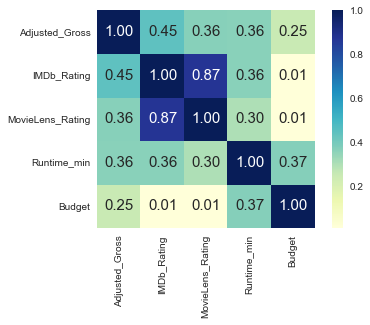

In [15]:
#Correlation Heatmap
corrmap = df_action_avl.corr()
columns = corrmap.nlargest(5, 'Adjusted_Gross')['Adjusted_Gross'].index
coff = np.corrcoef(df_action_avl[columns].values.T) 
heatmap = sns.heatmap(coff, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, cmap = 'YlGnBu', yticklabels=columns.values, xticklabels=columns.values)

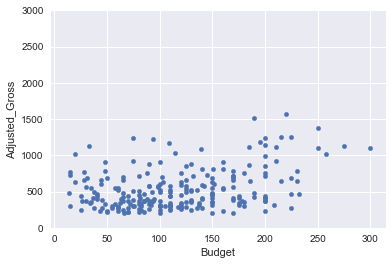

In [16]:
#Scattplot
data = pd.concat([df_action_avl['Adjusted_Gross'], df_action_avl['Budget']], axis = 1)
data.plot.scatter(x = 'Budget', y = 'Adjusted_Gross', ylim=(0,3000))

### 4. Normalization

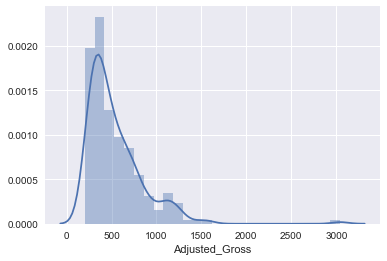

In [17]:
sns.distplot(df_action_avl['Adjusted_Gross'])

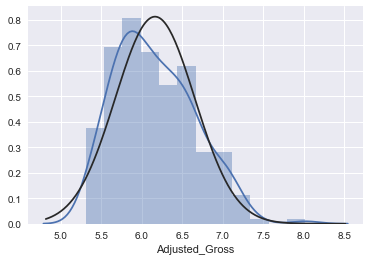

In [18]:
#Normalizing Adjusted_Gross column by using log
df_action_avl['Adjusted_Gross'] = np.log(df_action_avl['Adjusted_Gross'])
sns.distplot(df_action_avl['Adjusted_Gross'], fit = norm)

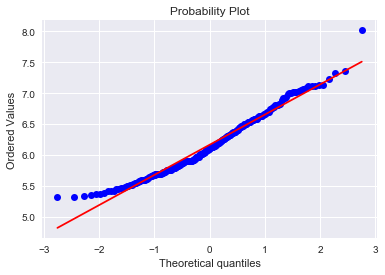

In [19]:
res_price = stats.probplot(df_action_avl['Adjusted_Gross'], plot=plt)

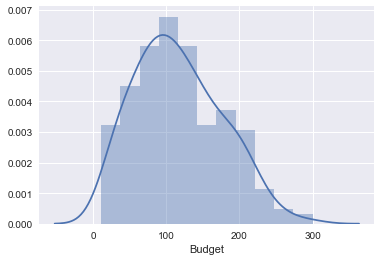

In [20]:
sns.distplot(df_action_avl['Budget'])

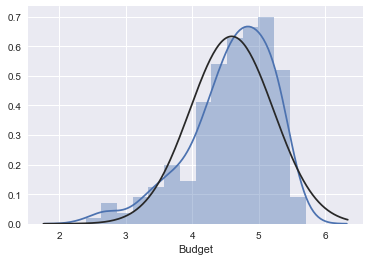

In [21]:
#Normalizing Budget column by using log
df_action_avl['Budget'] = np.log(df_action_avl['Budget'])
sns.distplot(df_action_avl['Budget'], fit = norm)

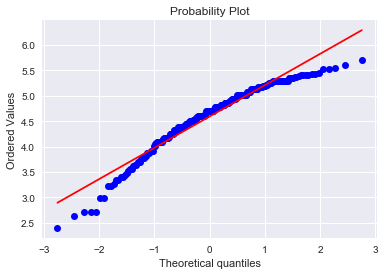

In [22]:
res_area = stats.probplot(df_action_avl['Budget'], plot=plt)

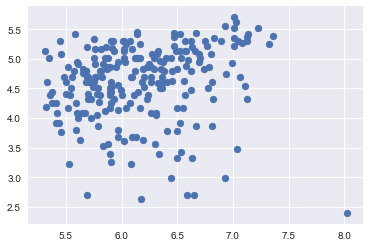

In [23]:
plt.scatter(df_action_avl['Adjusted_Gross'], df_action_avl['Budget'])

### 5. Modeling

In [24]:
x = np.array(df_action_avl['Budget']).reshape(-1, 1)
y = np.array(df_action_avl['Adjusted_Gross']).reshape(-1, 1)

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.7, random_state=None)
linreg = sm.GLS(y_test, x_test).fit()
print (linreg.summary())

                            GLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.977
Model:                            GLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     6859.
Date:                Thu, 04 Jan 2018   Prob (F-statistic):          2.49e-136
Time:                        21:19:52   Log-Likelihood:                -226.50
No. Observations:                 166   AIC:                             455.0
Df Residuals:                     165   BIC:                             458.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.3289      0.016     82.820      0.0